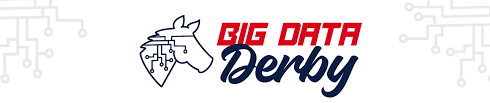

## 🏗<b> Basics of my analysis choice</b><br><br>
➛ The study of the skeleton of different horses shows that racing animals are <b>not sufficiently prepared</b> for the extreme mechanical stresses during a race.<br><br>
➛ The resulting injuries, often fatal, <b>could be prevented</b> with <b>proper training</b> that strengthens the bones.<br><br>
➛ 70% of these injuries occur in the third metacarpal bone between the knee and the horse’s paturon.<br><br>
➛ In an attempt to find a way to predict and prevent these fractures, <b>researchers at Johns Hopkins Medicine</b> have therefore sought to understand how the third metacarpal bone responds to mechanical stresses, such as those encountered during racing.<br><br>
➛ The bones are <b>simply not prepared</b> for the forces suffered during races<br><br>
➛ Researchers therefore suggest <b>pushing the training</b> of racehorses around exercises that would <b>increase bone density</b>, such as <b>taking tighter turns at higher speeds</b>.<br><br>
➛ At the same time, the effort required of horses is greater in a curve than in a straight line.<br><br>
➛ The horse must make a more intense effort to stay inside the bend and restore its balance. <br><br>
➛ Muscles on the inner side of the horse are greatly stressed so that the horse does not collapse

##  🎯<b>Main goal of the project</b><br><br>

➛ In order to prevent injuries, the idea is to analyze the average speed in a corner during the race. <br><br>

$\;\;\;\;\;\;$➜<b>Which races will be analyzed?</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$♢ The Maiden Claiming Races during winter on Belmont hippodrom<br><br>
$\;\;\;\;\;\;$➜<b>Why the Maiden Claming Races ?</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$♢In this such of race, horses beginning their careers have failed to show their connections enough talent during training.<br><br>
$\;\;\;\;\;\;\;\;\;\;$♢ In order to maximize their chance of victory, it is important to know the race conditions.<br><br>
$\;\;\;\;\;\;\;\;\;\;$♢ These race conditions, especially the average speed in the curve, allows the trainer to:<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$✣ train horse to minimize the risk of injury<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$✣ if the horse is able to follow this rhythm.<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$✣ maximize chances of victories by selecting the most suitable race profile of the horse<br><br>

$\;\;\;\;\;\;$➜<b>Why during the winter ?</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$♢ With the cold, his muscles take longer to warm up.<br><br>
$\;\;\;\;\;\;\;\;\;\;$♢ To avoid an injury, the warm-up time is essential and also depends on the intensity of the race.




##  🛠 <b><ins>Technical stuffs</b></ins>

### 🚧 **Loading packages**

In [1]:
import pandas as pd
import numpy as np

import haversine as hs

import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor

from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline,Pipeline

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

import category_encoders as ce

import xgboost as xgb
from sklearn.linear_model import LinearRegression,Lasso,Ridge

from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

# Fix error display map
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import missingno as msno

🏥<b> Helper functions</b>

In [2]:
#Checking percentage of missing value

def percent_missing_value(df):
    feature_50=[]
    print('Variables and percentage of missing values')
    print('▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️ ')
    for i in df.columns:
        number=df[i].isna().sum()
        percentage=number/len(df)*100
       
        if percentage>0:
            print(i,' :',number, ' soit ',"%.2f"%percentage+'% de valeurs manquantes')
        if percentage>50:
            feature_50.append(i)
    print('▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️ ')
    print('List of variables with more than 50 missing values ',feature_50)
    print('▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️ ')
    print('Number of missing values ',"{:,}".format(df.isna().sum().sum()),' on ',"{:,}".format(df.shape[0]*
                                                                                               df.shape[1]))
    print('▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️ ')
    print('Percentage of missing values ',str("%.2f"%(df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100)),' %')
    print('▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️ ')
    print("Heatmap for viewing missing values",'\n','➙ Number of rows : ',"{:,}".format(df.shape[0]),'\n','➙ Number of columns : ',
          "{:,}".format(df.shape[1]))
    msno.matrix(df,filter='bottom',figsize=(25, 10),sparkline=False,color=(171/255, 235/255, 198/255 ));
    return feature_50

In [3]:
def single_value_search(df):
    list_column_single=[]
    for col_ in df.columns:
        if len((np.unique(df[col_])).astype(str))==1:
            list_column_single.append(col_)
        
    if len(list_column_single)>0:
    
        print('Columns contain a single value')
        print(list_column_single)
    else:
        print("None of the columns contains a single value.")

💾  <b>Loading data and overview</b>

In [4]:
# Creating variable names

columns_=['track_id','race_date','race_number','program_number','trakus_index',
 'latitude','longitude','distance_id','course_type','track_condition',
 'run_up_distance','race_type','purse','post_time','weight_carried',
 'jockey','odds','final_place']

# Loading data

turf=pd.read_csv('/kaggle/input/big-data-derby-2022/nyra_2019_complete.csv', low_memory=False,index_col=False,
                 names=columns_, header=None)

In [5]:
turf.head(2)

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,final_place
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [6]:
race=pd.read_csv('/kaggle/input/big-data-derby-2022/nyra_race_table.csv')
race.head(2)

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250


In [7]:
# Add Seasons

race['season']=pd.cut(pd.to_datetime(race['race_date']).dt.month,
                      bins=[0,2,5,8,11,12],
                      labels=['winter','spring','summer','autumn','winter'],
                    ordered=False)

turf['season']=pd.cut(pd.to_datetime(turf['race_date']).dt.month,
                      bins=[0,2,5,8,11,12],
                      labels=['winter','spring','summer','autumn','winter'],
                    ordered=False)

In [8]:
# Add race categorical : Course or Sprint

race['sprint_course']=pd.cut(race['distance_id'],
                      bins=[0,800,2000],
                      labels=['sprint','course'])

turf['sprint_course']=pd.cut(turf['distance_id'],
                      bins=[0,800,2000],
                      labels=['sprint','course'])

In [9]:
# Add unique identifiant for each track

race['id_race']=race['track_id']+race['race_date']+race['race_number'].astype(str)

turf['id_race']=turf['track_id']+turf['race_date']+turf['race_number'].astype(str)

# Add unique identifiant for each track and horse

turf['id_horse']=turf['id_race']+turf['program_number'].astype(str)

In [10]:
# Selection of the races to analyse

df=turf[(turf['race_type']=='MCL')&(turf['sprint_course']=='sprint')&(turf['track_id']=='AQU')&(turf['season']=='winter')]

🧮 <b><ins>Frequency distribution between races, distances and track conditions</b></ins>

In [11]:
selected_races=race[(race['race_type']=='MCL')&(race['sprint_course']=='sprint')&(race['track_id']=='AQU')&(race['season']=='winter')]
pd.crosstab(index=selected_races['track_condition'],columns=selected_races['distance_id'],margins=True)

distance_id,550,600,650,700,800,All
track_condition,,,,,,
FT,4,11,10,3,16,44
GD,0,2,1,1,3,7
MY,1,6,3,0,1,11
SY,2,5,3,2,3,15
All,7,24,17,6,23,77


In [12]:
# Drop variables do not use

df=df[['id_race','id_horse','program_number','trakus_index','latitude','longitude','distance_id','run_up_distance','course_type',
    'track_condition']]

Variables and percentage of missing values
▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️ 
▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️ 
List of variables with more than 50 missing values  []
▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️ 
Number of missing values  0  on  2,136,620
▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️ 
Percentage of missing values  0.00  %
▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️▪️ 
Heatmap for viewing missing values 
 ➙ Number of rows :  213,662 
 ➙ Number of columns :  10


[]

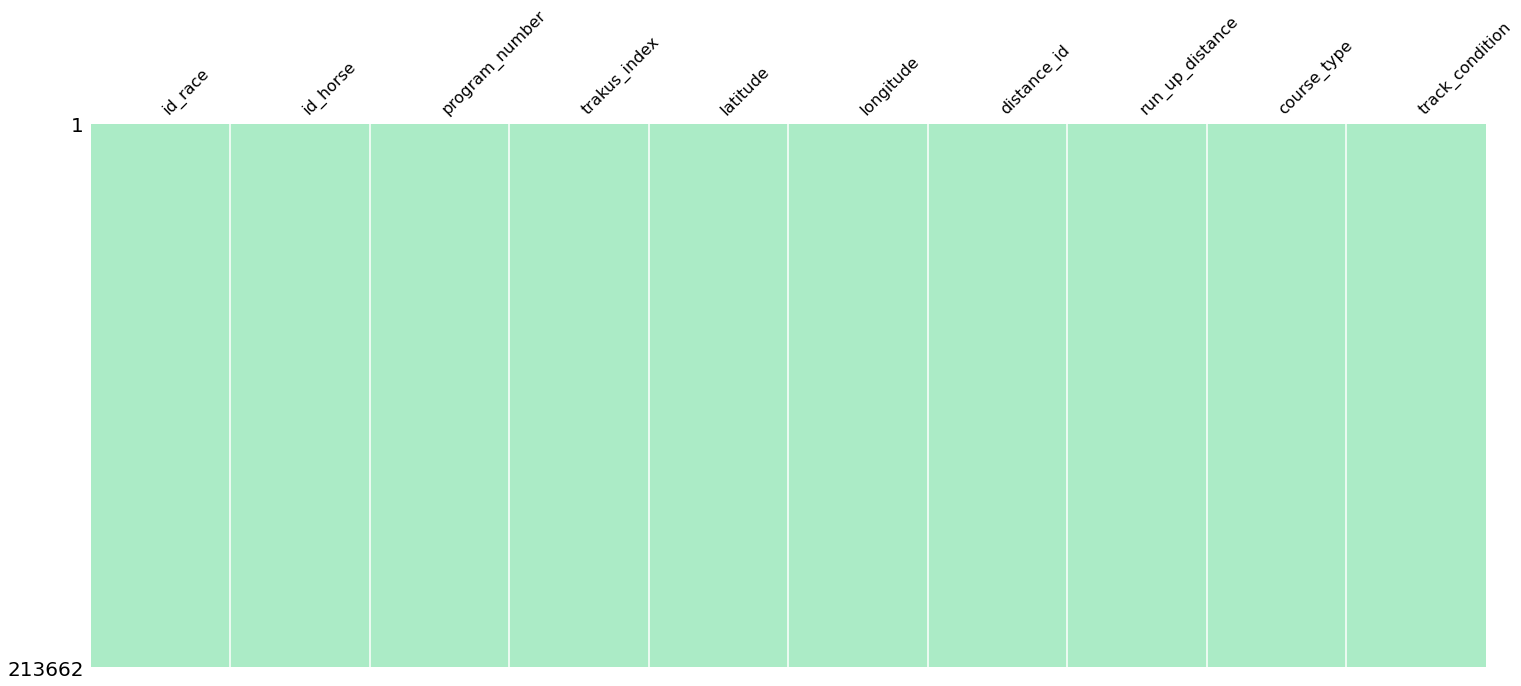

In [13]:
# Checking missing values

percent_missing_value(df)

In [14]:
# Single value search

single_value_search(df)

Columns contain a single value
['course_type']


In [15]:
# Drop column with single value

df=df.drop(['course_type'],axis=1)

In [16]:
df.head(2)

,id_race,id_horse,program_number,trakus_index,latitude,longitude,distance_id,run_up_distance,track_condition
434625,AQU2019-12-011,AQU2019-12-0113,3,1,40.669350,-73.829211,650,54,FT
434626,AQU2019-12-011,AQU2019-12-0113,3,2,40.669354,-73.829209,650,54,FT


In [17]:
# Sort dataframe by id_horse and trakus index in order to calculate the distance runned

df=df.sort_values(['id_horse','trakus_index']).reset_index().drop(['index'],axis=1)

In [18]:
df['part']=0
for i in df.index:
    if (df['latitude'].iloc[i]>40.66684)&(df['latitude'].iloc[i]<40.67395)&\
    (df['longitude'].iloc[i]>-73.83038)&(df['longitude'].iloc[i]<-73.82714):
        df['part'].iloc[i]='line_1'
    elif (df['latitude'].iloc[i]<40.67465)&(df['latitude'].iloc[i]>40.670)&\
    (df['longitude'].iloc[i]>-73.83222)&(df['longitude'].iloc[i]<-73.83047):
        df['part'].iloc[i]='line_2'
    else:
        df['part'].iloc[i]='curve'

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# Distance covered between each trakus

df['latitude_prev']=df['latitude'].shift(1)
df['longitude_prev']=df['longitude'].shift(1)

df['dist_cov']=0

for i in df.index:
    if df['trakus_index'].iloc[i]==1:
        df['dist_cov'].iloc[i]=0
    else:
        a=(df['longitude'].iloc[i],df['latitude'].iloc[i])
        b=(df['longitude_prev'].iloc[i],df['latitude_prev'].iloc[i])
        
        df['dist_cov'].iloc[i]=hs.haversine(a,b,hs.Unit.MILES)
    

In [20]:
## Vitesse
df['times']=0.25
df['speed']=df['dist_cov']/0.25*3600

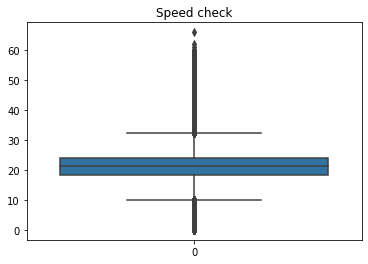

In [21]:
# Speed check

sns.boxplot(data=df['speed'])
plt.title('Speed check');

👩🏼‍⚕️ <b>Observation</b>:

$\;\;\;\;\;\;$➜ No value seems to be absurd

In [22]:
# Average speed per race and race segment
df_final=df.groupby(['id_race','part','distance_id','run_up_distance','track_condition']).mean(['speed','latitude','longitude'])\
 .drop(['trakus_index','latitude','longitude','latitude_prev','longitude_prev','dist_cov','times'],axis=1).reset_index()
                                                            
df_final.head()

,id_race,part,distance_id,run_up_distance,track_condition,speed
0,AQU2019-01-012,curve,600,48,MY,35.204070
1,AQU2019-01-012,line_1,600,48,MY,20.712639
2,AQU2019-01-012,line_2,600,48,MY,19.319164
3,AQU2019-01-013,curve,550,54,MY,36.117914
4,AQU2019-01-013,line_1,550,54,MY,19.117463


👩🏼‍🎨<b><ins>Example of a course trace<b><ins>

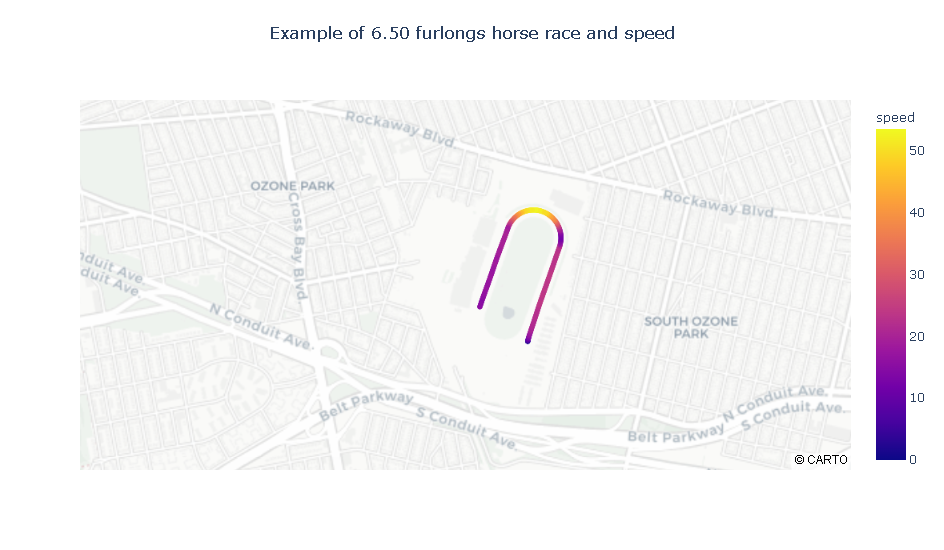

In [23]:
# Map of speed

init_notebook_mode(connected=True)

fig = px.scatter_mapbox(df[df['id_horse']=='AQU2019-01-0632  '], lat="latitude", 
                        lon="longitude", 
                        color='speed',
                        color_discrete_sequence=["blue"], 
                        zoom=14, height=550, width=900, 
                        size_max=10,
                       title='Example of 6.50 furlongs horse race and speed')
fig.update_layout(mapbox_style="carto-positron",title_x=0.5,
    title_y=0.95,)

fig.show()

 👩🏼‍⚕️ <b>Observation</b>:

$\;\;\;\;\;\;$➜ The speed in the curve is more important than in straight lines

## ⚗️ <ins>Let's go to the analysis</ins>

In [24]:
df_final=df_final[df_final['part']=='curve'].merge(df_final[df_final['part']=='line_1'][['id_race','speed']],\
                                                  on='id_race',how='left')\
                                           .rename(columns={'speed_x':'speed_curve','speed_y':'speed_line 1'})
df_final.head(2)

,id_race,part,distance_id,run_up_distance,track_condition,speed_curve,speed_line 1
0,AQU2019-01-012,curve,600,48,MY,35.204070,20.712639
1,AQU2019-01-013,curve,550,54,MY,36.117914,19.117463


In [25]:
# Convert run-up-distance and distance as ordinal variables.
df_final['run_up_distance']=df_final['run_up_distance'].astype(str)
df_final['distance_id']=df_final['distance_id'].astype(str)

 👩🏼‍⚕️ <b>Interrogation</b>:

$\;\;\;\;\;\;$➜ Is the speed influenced by:<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ Distance <br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ Track condition<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ Run-up-distance<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ Average mean during the first sprint line<br><br>

🔎 <b>How could this be proven?</b>

$\;\;\;\;\;\;$➜ The solution is to use a correlation test.<br><br>
$\;\;\;\;\;\;$➜ The correlation test depends on the type of variable to be tested:

🏇 <b>Does the distance of the course influence the speed in the curve?<b>
    
$\;\;\;\;\;\;\;\;\;\;$➜ Speed is a numerical variable.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Distance is a ordinal variable with 5 groups
    
    

 👉🏼To answer this question, we will the Kruskall-Wallis test.

$\;\;\;\;\;\;\;\;\;\;$➜ Null hypothesis: The speed is not depending on the distance.

 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ If the p-value is less than 0.05, we can reject the null hypothesis.
    


## 🏇🏼 <ins><b>Does the distance of the course influence the speed in the curve?</ins></b>

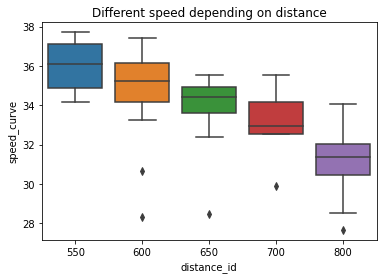

In [26]:
sns.boxplot(data=df_final.sort_values('distance_id'),x='distance_id',y='speed_curve')
plt.title('Different speed depending on distance');

👩🏼‍🏫<b><ins>Report:</b></ins><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It seems that depending on the distance of the race the speed would be different

🏇 <b>Does the condition distance influence the speed in the curve?<b>
    
$\;\;\;\;\;\;\;\;\;\;$➜ Speed is a numerical variable.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Distance are  ordinal variables with 5 groups<br><br>
    
 👉🏼To answer this question, we will the Kruskall-Wallis test.<br><br>
​
$\;\;\;\;\;\;\;\;\;\;$➜ Null hypothesis: The speed is not depending on the track condition.<br><br>
​
 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ If the p-value is less than 0.05, we can reject the null hypothesis.<br><br>

In [27]:
# Create the different group

group_550=df_final[df_final['distance_id']=='550']
group_600=df_final[df_final['distance_id']=='600']
group_650=df_final[df_final['distance_id']=='650']
group_700=df_final[df_final['distance_id']=='700']
group_800=df_final[df_final['distance_id']=='800']

In [28]:
# Test kruskall
stats.kruskal(group_550['speed_curve'],
              group_600['speed_curve'],
             group_650['speed_curve'],
             group_700['speed_curve'],
             group_800['speed_curve'])

KruskalResult(statistic=40.036275136384745, pvalue=4.254294462116582e-08)

💂🏼‍♀️ <b>To the question <em>"Does the distance of the course influence the speed in the curve?"
"</em></b><br><br>$\;\;\;\;\;\;\;\;\;$⇢ We can answer that the p-value is <b>smaller than 0.05%</b>.<br><br>$\;\;\;\;\;\;\;\;\;$⇢ So, We can <b>reject</b> the null hypothesis.<br><br>$\;\;\;\;\;\;\;\;\;$⇢ We conclude that there is a <b>statistically significant association</b> between the speed in the curve and the distance.

## 🏇🏼 <ins><b>Does the track condition influence the speed in the curve?</ins></b>

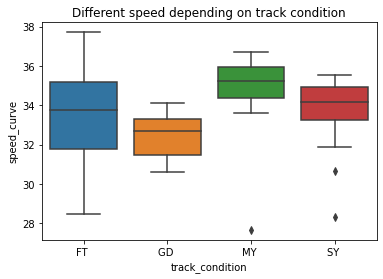

In [29]:
sns.boxplot(data=df_final.sort_values('track_condition'),x='track_condition',y='speed_curve')
plt.title('Different speed depending on track condition');

👩🏼‍🏫<b><ins>Report:</b></ins><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It seems that depending on the track condition the speed would be different

🏇 <b>Does the condition track influence the speed in the curve?<b>
    
$\;\;\;\;\;\;\;\;\;\;$➜ Speed is a numerical variable.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Track conditions are  ordinal variables with 4 groups
    
    
 👉🏼To answer this question, we will the Kruskall-Wallis test.

$\;\;\;\;\;\;\;\;\;\;$➜ Null hypothesis: The speed is not depending on the track condition.

 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ If the p-value is less than 0.05, we can reject the null hypothesis.
    


In [ ]:
# Build the different group

group_ft=df_final[df_final['track_condition']=='FT ']
group_gd=df_final[df_final['track_condition']=='GD ']
group_my=df_final[df_final['track_condition']=='MY ']
group_sy=df_final[df_final['track_condition']=='SY ']


In [ ]:
# Test kruskall
stats.kruskal(group_ft['speed_curve'],
              group_gd['speed_curve'],
             group_my['speed_curve'],
             group_sy['speed_curve'])

💂🏼‍♀️ <b>To the question <em>"Does the condition track influence the speed in the curve?"
"</em></b><br><br>$\;\;\;\;\;\;\;\;\;$⇢ We can answer that the p-value is <b>slightly higher than 0.05%</b>.<br><br>$\;\;\;\;\;\;\;\;\;$⇢ So, We should <b>reject</b> the null hypothesis.<br><br>
$\;\;\;\;\;\;\;\;\;$⇢ But given the p-value, we can be 94% sure that track conditions influence speed.

## 🏇🏼 <ins><b>Does the run-up-distance influence the speed in the curve?</ins></b>

In [ ]:
sns.boxplot(data=df_final.sort_values('run_up_distance'),x='run_up_distance',y='speed_curve')
plt.title('Different speed depending on track condition');

👩🏼‍🏫<b><ins>Report:</b></ins><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It seems that depending on the run-up-distance the speed would be different

🏇 <b>Does the condition track influence the speed in the curve?<b>
    
$\;\;\;\;\;\;\;\;\;\;$➜ Speed is a numerical variable.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Run-up-distance are  ordinal variables with 4 groups
    
    
 👉🏼To answer this question, we will the Kruskall-Wallis test.

$\;\;\;\;\;\;\;\;\;\;$➜ Null hypothesis: The speed is not depending on run-up-distance.

 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ If the p-value is less than 0.05, we can reject the null hypothesis.
    


In [ ]:
# Create group

group_30=df_final[df_final['run_up_distance']=='30']
group_32=df_final[df_final['run_up_distance']=='32']
group_33=df_final[df_final['run_up_distance']=='33']
group_36=df_final[df_final['run_up_distance']=='36']
group_40=df_final[df_final['run_up_distance']=='40']
group_44=df_final[df_final['run_up_distance']=='44']
group_45=df_final[df_final['run_up_distance']=='45']
group_48=df_final[df_final['run_up_distance']=='48']
group_50=df_final[df_final['run_up_distance']=='50']
group_52=df_final[df_final['run_up_distance']=='52']
group_54=df_final[df_final['run_up_distance']=='54']
group_55=df_final[df_final['run_up_distance']=='55']
group_60=df_final[df_final['run_up_distance']=='60']
group_63=df_final[df_final['run_up_distance']=='63']

In [ ]:
# Test kruskall
stats.kruskal(group_30['speed_curve'],group_32['speed_curve'],group_33['speed_curve'],group_36['speed_curve'],
              group_40['speed_curve'],group_44['speed_curve'],group_45['speed_curve'],group_48['speed_curve'],
              group_50['speed_curve'],group_52['speed_curve'],group_54['speed_curve'],group_55['speed_curve'],
              group_60['speed_curve'],group_63['speed_curve'])

💂🏼‍♀️ <b>To the question <em>"Does the run-up distance influence the speed in the curve?"
"</em></b><br><br>$\;\;\;\;\;\;\;\;\;$⇢ We can answer that the p-value is <b>smaller than 0.05%</b>.<br><br>$\;\;\;\;\;\;\;\;\;$⇢ So, We can <b>reject</b> the null hypothesis.<br><br>$\;\;\;\;\;\;\;\;\;$⇢ We conclude that there is a <b>statistically significant association</b> between the speed in the curve and the run-up-distance.

## 🏇🏼 <ins><b>Does the speed in first line influence the speed in the curve?</ins></b>

In [ ]:
sns.scatterplot(data=df_final,x='speed_line 1',y='speed_curve')

👩🏼‍🏫<b><ins>Report:</b></ins><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It seems that the speed in first line is not really correlated to the speed in the curve

🏇 <b>Does the speed in first line vary depending on the speed in the curve?<b>
    
$\;\;\;\;\;\;\;\;\;\;$➜ Speed in the curve and in first line are  numerical variable.<br><br>

    
 👉🏼To answer this question, we will the Kendall Tau test.

$\;\;\;\;\;\;\;\;\;\;$➜ Null hypothesis: The speed is not depending on run-up-distance.

 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ If the p-value is less than 0.05, we can reject the null hypothesis.
    


In [ ]:
# Kendall Tau Test

stats.kendalltau(df_final['speed_line 1'],df_final['speed_curve'])

💂🏼‍♀️ <b>To the question <em>"Does the speed in first line influence the speed in the curve?"
"</em></b><br><br>$\;\;\;\;\;\;\;\;\;$⇢ We can answer that the p-value is <b>slightly higher than 0.05%</b>.<br><br>$\;\;\;\;\;\;\;\;\;$⇢ So, We should <b>reject</b> the null hypothesis.<br><br>
$\;\;\;\;\;\;\;\;\;$⇢ But given the p-value, we can be 94% sure that speed in first line influence speed in the curve.

## 🧙🏼‍♀️<b><ins>Predict the speed according to run-up-distance, distance, condition track and speed in first line?</b></ins>

📚 <b>How determine wich algorithm to be used?</b><br><br>
$\;\;\;\;\;\;$📍<b>Unsuperviser or supervised</b>:<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ We <b>know the target</b>, so it is a <em><b>supervised</em></b> problem<br><br>
$\;\;\;\;\;\;$📍<b>Regression or Classification</b>:<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ The target is <b>numerical</b>,It is a <em><b>regression</em></b> problem

🧱 <b>The different stages</b><br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$⚀ Separate Predictors(X) and Target (y)<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$⚁ Split the data in train set and test set<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$⚂ Preprocessing<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$⚃ Train the model and test the model<br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;$⚄ Choose the best model<br><br>

In [ ]:
# Split data X: Features and y : the target

X=df_final[['distance_id', 'run_up_distance', 'track_condition','speed_line 1']]
y=df_final[['speed_curve']]

# Feature names and target name

print('Feature names: ',np.unique(X.columns))
print('\n Target name :',df_final.columns[-3])

In [ ]:
# Split data into train and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Split categorical variables and numerical variables

numerical_features=make_column_selector(dtype_include=np.number)

categorical_features=make_column_selector(dtype_exclude=np.number)

🧱 <b>Steps of preprocessing</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Handling with missing value : no need<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>Encoding</b> the categorical data with <b>CatBoostEncoder</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Make data <b>more normal</b> with <b>PowerTransformer</b> and parameter <b>'method'</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Features <b>scaling</b> with <b>PowerTransformer</b> and parameter <b>'standardize'</b><br><br>

🙋🏼 <b>Explain my choices</b><br><br>
$\;\;\;\;\;\;$📍 <b>Why use PowerTransformer for numerical data?</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It makes data <b>more gaussian</b>.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ The method <b>'yeo-johnson'</b> supports both <b>positive or negative</b> data
as well as 0.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It will also <b>standardize data automatically</b> after processing, which means that each variable will have a zero mean and a unit variance.
<br><br>
$\;\;\;\;\;\;$📍 <b>Why use Cat boost encoder</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Many machine learning algorithms require data to be numeric.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ So, before training a model, we need to convert categorical data into numeric form.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Catboost is a <b>target-based categorical encoder</b>.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ It is a <b>supervised encoder</b> that <ins>encodes categorical columns according to the target value</ins>.<br><br> 


In [ ]:
# Pipeline for numerical and categorical pipelines

numerical_pipeline=make_pipeline(PowerTransformer(standardize=True))

categorical_pipeline=make_pipeline(ce.CatBoostEncoder())

In [ ]:
#Preprocessing for features

preprocessor=make_column_transformer((categorical_pipeline,categorical_features),
                                     (numerical_pipeline,numerical_features))


👩🏼‍💻 Which models will be tested<br><br>
$\;\;\;\;\;\;$📍 Selection of 4 regression models wich differents hyperparameters to be tested<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Ordinary least squares <br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Ridge<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Lasso<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ xgboost<br><br>

In [ ]:
# Hyperparameters to be tested for each model

params_ols={'model__regressor__fit_intercept':[True,False]}

params_xgb= {"model__regressor__max_depth":    [3,10],
             "model__regressor__n_estimators": [10,20,50],
             "model__regressor__learning_rate": [0.1,0.2,0.3]}

params_ridge={'model__regressor__alpha':[0.001,0.002],
               'model__regressor__fit_intercept':[True,False]}

params_lasso={'model__regressor__alpha':[0.01,0.02,0.03]}

In [ ]:
# Regression models to be tested

models_={'ols':{'model':LinearRegression(),'params':params_ols},
       'lasso':{'model':Lasso(),'params':params_lasso},
       'ridge':{'model':Ridge(),'params':params_ridge},
        'xgb':{'model':xgb.XGBRegressor(objective='reg:squarederror'),'params':params_xgb}}

👩🏼‍💻  <b><ins>Process</ins></b><br><br>
$\;\;\;\;\;\;$📍 Loop to call each model<br><br>
$\;\;\;\;\;\;$📍 <b>GridSearchCV</b> <ins>tunes hyperparameters</ins> in order to determine the optimal values for a given model :<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>Preprocessor</b> in GridSearchcv corresponds to the <ins>transformations of the numerical and categorical predictors</ins>.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>Model</b> is be used with <b>TransformedTargetRegressor</b>.<br><br>
 $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ <b>TransformedTargetRegressor</b> object <ins>wraps a given model and a <b>scaling output data</b></ins>.



In [ ]:
%%time
for model_ in models_.keys():
    
    model = TransformedTargetRegressor(regressor=models_[model_]['model'],
                                       transformer=PowerTransformer(standardize=True))
    
    pipe = Pipeline(steps=[('preprocessor',preprocessor),('model', model)])
    
    ## GridSearch CV
    
    search=GridSearchCV(estimator=pipe,param_grid=models_[model_]['params'],cv=5)
    search.fit(X_train,y_train)
    model_best_param=search.best_estimator_
    
    # Predict y with best params with each model
    y_preds=model_best_param.predict(X_test)
    
    print('📊📊📊📊📊📊📊📊📊📊 MODEL TESTED :'+model_.upper()+' 📊📊📊📊📊📊📊📊📊')
    #Plot error
    plt.figure(figsize=(5,5))
    erreur_hist=np.abs(y_test-y_preds)
    sns.displot(erreur_hist)
    plt.show();
    print(search.best_params_)
    print('best Score N for training set:' ,"{:,.2f}".format(search.best_score_))
    print('RMSE : ',"{:e}".format(np.sqrt(mean_squared_error(y_test,y_preds))))
    print('Median :',np.median(erreur_hist))
    print('\n')

👩🏼‍🏫 <b><ins>To conclude on this point</ins> : Can we estimate the speed in the curve?</ins></b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ The best model to be uses is <b>Ridge</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>R2</b> : 0.34 , that means that the model explains 34 per cent of the variance of the data<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>RMSE</b> : On average, the prediction error is 1 mile per hour.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b>Median</b> : 50% of prediction errors are less than 0.90 mile per hour.

In [ ]:
# Best Model
model=Lasso()
model = TransformedTargetRegressor(regressor=models_[model_]['model'],
                                       transformer=PowerTransformer(standardize=True))
pipe = Pipeline(steps=[('preprocessor',preprocessor),('model', model)])

    ## GridSearch CV
search=GridSearchCV(estimator=pipe,param_grid=params_lasso,cv=5)
search.fit(X_train,y_train)
final_model=search.best_estimator_

In [ ]:
# Score for each predictors

data={'Predictors':np.array(X.columns),
      'Importance':final_model.named_steps['model'].regressor_.feature_importances_}

predictor_importance=pd.DataFrame(data).sort_values(by=['Importance'],ascending=False)

plt.bar(x=predictor_importance['Predictors'],height=predictor_importance['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Predictor')
plt.ylabel('Predictor score')
plt.title('Scores for each predictor')
plt.show()

📽 <b><ins>Zoom on predictors</b></ins><br><br>
$\;\;\;\;\;\;$📍 Let's use the attribut <b>features_importance</b><br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ Feature importance refers to techniques that <b>assign a score</b> to input predictors based on <ins>how useful they are at predicting a target variable</ins>.

 ## 👩🏼‍🎓<b><ins>Final conclusion</b></ins><br><br>

$\;\;\;\;\;\;\;\;\;\;$➜ <b><ins>Goal of the project</b></ins><br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ Prevent injuries in the horse racing<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b><ins>How</b></ins><br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ Predict speed in the curve in order to train horses and select the suitable race<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b><ins>Discovery</b></ins><br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ Distances and run-up-distance are the most useful features to predict speed.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b><ins>Downside</b></ins><br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ The model suffers from a lack of data.<br><br>
$\;\;\;\;\;\;\;\;\;\;$➜ <b><ins>To go further</b></ins><br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$♢ Extend the study to all races (racetrack, season, type)

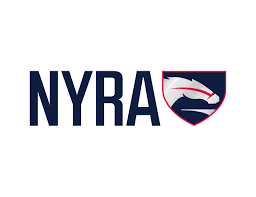